<a href="https://colab.research.google.com/github/olinyoder2534/NLP_practice/blob/main/sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install spacy
#!pip install tensorflow

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
#import torch
#import spacy

In [ ]:
data = pd.read_csv('/content/Reviews.csv.zip')

In [ ]:
data1 = data

In [ ]:
data2 = data

## Bert


In [ ]:
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [ ]:
data.dtypes

Id                         int64
ProductId                 object
UserId                    object
ProfileName               object
HelpfulnessNumerator       int64
HelpfulnessDenominator     int64
Score                      int64
Time                       int64
Summary                   object
Text                      object
dtype: object

In [ ]:
data.shape

(568454, 10)

In [ ]:
#only going to use first 20000 rows
data = data.head(20000)

In [ ]:
data['Score'].value_counts()
#going to resample using undersampling later

Score
5    12571
4     2836
1     1824
3     1649
2     1120
Name: count, dtype: int64

In [ ]:
#comparing helpfulness numerator and denominator
comparison = data['HelpfulnessNumerator'] == data['HelpfulnessDenominator']

equal_values = comparison.sum()
non_equal_values = len(comparison) - equal_values

print('Equal values: ', equal_values)
print('Non equal values: ', non_equal_values)

Equal values:  15906
Non equal values:  4094


In [ ]:
#creating a decimal for helpfulness

data['Helpfulness'] = data['HelpfulnessNumerator'] / data['HelpfulnessDenominator']

data.head()

<ipython-input-12-63550be7b756>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Helpfulness'] = data['HelpfulnessNumerator'] / data['HelpfulnessDenominator']


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Helpfulness
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,NaN
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1.0
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,1.0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,NaN


In [ ]:
data['Helpfulness'] = data['Helpfulness'].fillna(0)
data.head()

<ipython-input-13-b679a3434cce>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Helpfulness'] = data['Helpfulness'].fillna(0)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Helpfulness
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0.0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1.0
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,1.0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,0.0


In [ ]:
data['Helpfulness'].value_counts()

Helpfulness
0.000000    10910
1.000000     6210
0.500000      746
0.666667      357
0.333333      242
            ...  
0.307692        1
0.266667        1
0.966292        1
0.945946        1
0.703704        1
Name: count, Length: 211, dtype: int64

In [ ]:
#removing columns
df_balanced = data.drop(columns=['Id', 'ProductId', 'UserId', 'ProfileName', 'Time', 'HelpfulnessNumerator', 'HelpfulnessDenominator'])
df_balanced.head()

,Score,Summary,Text,Helpfulness
0,5,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0
1,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0.0
2,4,"""Delight"" says it all",This is a confection that has been around a fe...,1.0
3,2,Cough Medicine,If you are looking for the secret ingredient i...,1.0
4,5,Great taffy,Great taffy at a great price. There was a wid...,0.0


In [ ]:
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
rus = RandomUnderSampler(random_state=42)
df_balanced, y_resampled = rus.fit_resample(data[['Text', 'Score']], data['Score'])

df_balanced = pd.DataFrame(df_balanced, columns=['Text', 'Score'])
df_balanced.head()

,Text,Score
0,I have a One:One Coffee Pod machine and have o...,1
1,We switched to Canidae ALS after the tainted f...,1
2,Consumer Reports rated these crackers the high...,1
3,Caribbean Joy coconut milk offers a tempting p...,1
4,These tablets hardly work in comparison with t...,1


In [ ]:
df_balanced['Score'] = df_balanced['Score'] - 1

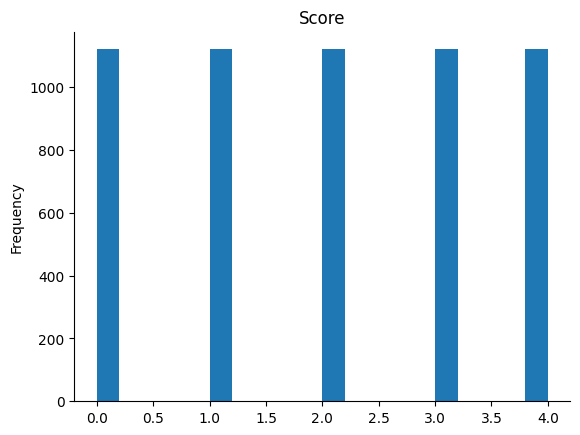

In [ ]:
from matplotlib import pyplot as plt
df_balanced['Score'].plot(kind='hist', bins=20, title='Score')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df_balanced.shape

(5600, 2)

In [ ]:
df_balanced['Score'].value_counts()

Score
0    1120
1    1120
2    1120
3    1120
4    1120
Name: count, dtype: int64

In [ ]:
#!pip install --upgrade tensorflow-hub==0.12.0
#!pip install --upgrade tensorflow-text==2.9.0

In [ ]:
#using BERT to vectorize

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text

preprocess_url = "https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3"
encoder_url = "https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4"

bert_preprocess = hub.KerasLayer(preprocess_url, name='bert_preprocess')
bert_encoder = hub.KerasLayer(encoder_url, name='bert_encoder')

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_balanced['Text'],df_balanced['Score'], stratify=df_balanced['Score'])

In [ ]:
y_train[:20]

3592    3
540     0
1766    1
1180    1
691     0
4359    3
3929    3
1081    0
1409    1
2157    1
2974    2
344     0
177     0
3483    3
5314    4
4750    4
929     0
2828    2
2243    2
2089    1
Name: Score, dtype: int64

In [ ]:
print(X_train.shape)
print(y_train.shape)

(4200,)
(4200,)


In [ ]:
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)

l = tf.keras.layers.Dropout(0.1, name="dropout")(outputs['pooled_output'])
l = tf.keras.layers.Dense(5, activation='softmax', name="output")(l)

model = tf.keras.Model(inputs=[text_input], outputs=[l])

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/5
132/132 [==============================] - 1952s 15s/step - loss: 1.6453 - accuracy: 0.2357
Epoch 2/5
132/132 [==============================] - 1950s 15s/step - loss: 1.5907 - accuracy: 0.2707
Epoch 3/5
132/132 [==============================] - 1944s 15s/step - loss: 1.5566 - accuracy: 0.3029
Epoch 4/5
132/132 [==============================] - 1942s 15s/step - loss: 1.5327 - accuracy: 0.3195
Epoch 5/5
132/132 [==============================] - 1938s 15s/step - loss: 1.5124 - accuracy: 0.3343


In [ ]:
#from google.colab import drive
#drive.mount('/content/gdrive')

ValueError: mount failed

In [ ]:
#model_save_name = 'sentiment1.keras'
#path = f"/content/gdrive/My Drive/sentiment1.keras"
#model.save(path)

In [ ]:
model.evaluate(X_test, y_test)

NameError: name 'model' is not defined

In [ ]:
predictions = model.predict(X_test)

44/44 [==============================] - 662s 15s/step


In [ ]:
predictions

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

In [ ]:
reviews = [
    'This product is terrible.',
    'This product is amazing',
    'This product is average'
]

model.predict(reviews)

1/1 [==============================] - 4s 4s/step


array([[1.],
       [1.],
       [1.]], dtype=float32)

## Vader

In [ ]:
#nlp = spacy.load("en_core_web_sm")

In [ ]:
nltk.download('vader_lexicon')

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [ ]:
print(sia.polarity_scores('This product is good'))
print(sia.polarity_scores('This product is bad'))

In [ ]:
data1 = data1.head(1000)
#not gonna balance data this time

In [ ]:
results = {}

for i, row in tqdm(data1.iterrows(), total = len(data1)):
  text = row['Text']
  id = row['Id']

  results[id] = sia.polarity_scores(text)

In [ ]:
results

In [ ]:
vaders = pd.DataFrame(results).T

In [ ]:
vaders = vaders.reset_index().rename(columns = {'index': 'Id'})
vaders = vaders.merge(data1, how = 'left')
vaders.head()

In [ ]:
sns.barplot(vaders, x = 'Score', y = 'compound')

In [ ]:
fig, axs = plt.subplots(1, 3, figsize = (15,5))
sns.barplot(vaders, x = 'Score', y = 'pos', ax = axs[0])
sns.barplot(vaders, x = 'Score', y = 'neu', ax = axs[1])
sns.barplot(vaders, x = 'Score', y = 'neg', ax = axs[2])

## RoBERTa

In [ ]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [ ]:
!pip install huggingface_hub

In [ ]:
from huggingface_hub import notebook_login
notebook_login()

In [ ]:
model_name = "cardiffnlp/twitter-roberta-base-sentiment"

tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

In [ ]:
def polarity_scores_roberta(row):
  encoded_text = tokenizer(row, return_tensors = 'pt')
  output = model(**encoded_text)
  scores = output[0][0].detach().numpy()
  scores = softmax(scores)
  scores_dict = {
      'neg' : scores[0],
      'neu' : scores[1],
      'pos' : scores[2],
  }
  return scores_dict

In [ ]:
results = {}

for i, row in tqdm(data1.iterrows(), total = len(data1)):
  try:
    text = row['Text']
    id = row['Id']
    vader_result = sia.polarity_scores(text)
    vader_result_rename = {}
    for key, value in vader_result.items():
      vader_result_rename[f"vader_{key}"] = value
    roberta_results = polarity_scores_roberta(text)
    both = {**vader_result_rename, **roberta_results}
    results[id] = both
  except RuntimeError:
    print(f'Broke for id {id}')

In [ ]:
data1.head()

In [ ]:
results_df = pd.DataFrame.from_dict(results, orient='index').reset_index().rename(columns={'index': 'Id'})

# Merge the results DataFrame with data1
data1 = pd.merge(data1, results_df, on='Id')

In [ ]:
data1.head()

In [ ]:
def calculate_roberta_score(row):
    if row['pos'] >= 0.8:
        return 5
    elif row['pos'] >= 0.6:
        return 4
    elif row['pos'] >= 0.4:
        return 3
    elif row['pos'] >= 0.2:
        return 2
    else:
        return 1

data1['RobertaScore'] = data1.apply(calculate_roberta_score, axis=1)
data1.head()

In [ ]:
comparison1 = data1['Score'] == data1['RobertaScore']

equal_values1 = comparison1.sum()
non_equal_values1 = len(comparison1) - equal_values1

In [ ]:
print(equal_values1)
print(non_equal_values1)

In [ ]:
count = 0
countnon = 0

for index, row in data1.iterrows():
  if row['Score'] == row['RobertaScore']:
    count += 1
  else:
    countnon += 1

acc = count / (count + countnon)
acc

In [ ]:
from transformers import pipeline

sent_pipeline = pipeline("sentiment-analysis")

In [ ]:
sent_pipeline('The product is bad.')

In [ ]:
sent_pipeline('The product is good.')

In [ ]:
sent_pipeline('The product is okay.')